In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

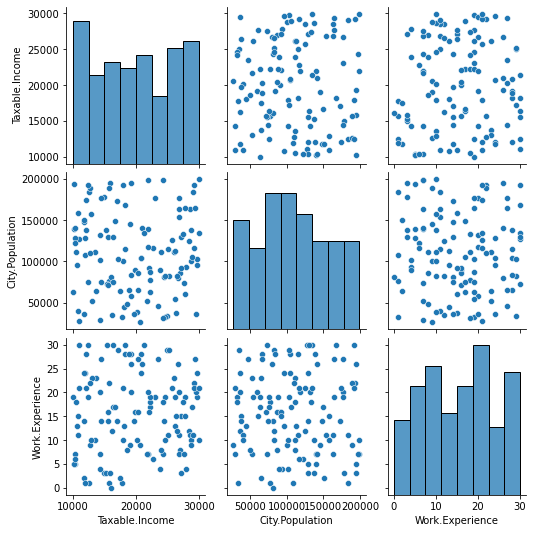

In [3]:
sns.pairplot(df[df["Taxable.Income"]<=30000])#Risky taxable income

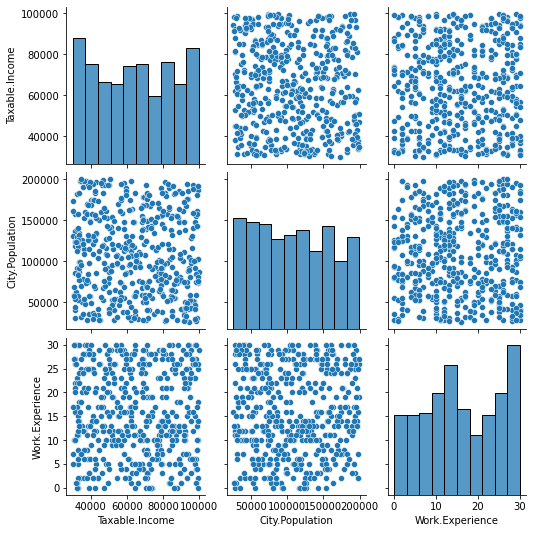

In [4]:
sns.pairplot(df[df["Taxable.Income"]>30000])#Good Taxable incomme

In [4]:
def funcx(x):
    if x<=30000:
        return 'Risky'
    return "Good"
df["Taxable.Income"]=df["Taxable.Income"].apply(funcx)

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
col=['Undergrad', 'Marital.Status',"Taxable.Income",'Urban']
for i in col:
    print(df[i].value_counts())


YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
Good     476
Risky    124
Name: Taxable.Income, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


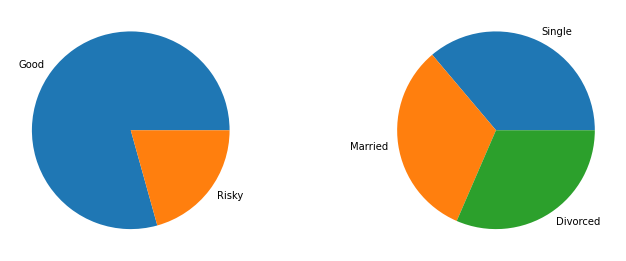

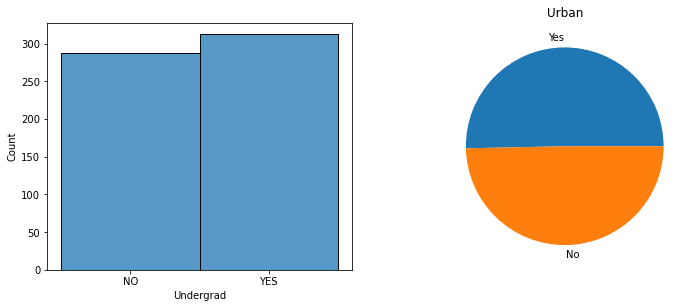

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.pie(df["Taxable.Income"].value_counts(),labels=["Good","Risky"])
plt.subplot(2,2,2)
plt.pie(df["Marital.Status"].value_counts(),labels=["Single","Married","Divorced"])
plt.show()
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(df["Undergrad"])
plt.xlabel("Undergrad")
plt.subplot(2,2,2)
plt.pie(df["Urban"].value_counts(),labels=["Yes","No"])
plt.title("Urban")
plt.show()



In [9]:

df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


### Checking the missing value

<AxesSubplot:>

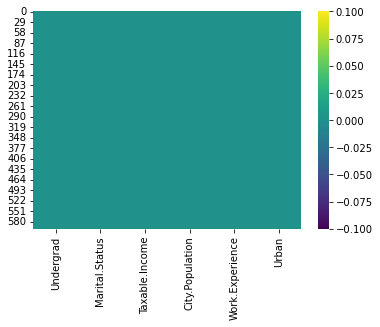

In [11]:
sns.heatmap(df.isnull(),cmap="viridis")#No any missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


### Changing categorical to numeric 

In [10]:
df1=pd.get_dummies(df["Marital.Status"])
df1.head()

,Divorced,Married,Single
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [11]:
df=pd.concat([df,df1],axis=1)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Divorced,Married,Single
0,NO,Single,Good,50047,10,YES,0,0,1
1,YES,Divorced,Good,134075,18,YES,1,0,0
2,NO,Married,Good,160205,30,YES,0,1,0
3,YES,Single,Good,193264,15,YES,0,0,1
4,NO,Married,Good,27533,28,NO,0,1,0


In [12]:
df_new=df.drop("Marital.Status",axis=1)

In [13]:
df_new.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Divorced,Married,Single
0,NO,Good,50047,10,YES,0,0,1
1,YES,Good,134075,18,YES,1,0,0
2,NO,Good,160205,30,YES,0,1,0
3,YES,Good,193264,15,YES,0,0,1
4,NO,Good,27533,28,NO,0,1,0


## [YES=1, GOOD=1];        [NO=0, RISKY=0]

In [14]:
def funx1(x1):
    if(x1 == 'YES') or (x1 == 'Good'):
        return 1
    return 0
no_col=["Undergrad","Urban","Taxable.Income"]
for i in no_col:
    df_new[i] =df_new[i].apply(funx1)
    


In [15]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [16]:
df_new['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

### Defining Explainatory and response variable

In [17]:
x=df_new.drop("Taxable.Income",axis=1)
y=df_new["Taxable.Income"]

In [18]:
x.head()

,Undergrad,City.Population,Work.Experience,Urban,Divorced,Married,Single
0,0,50047,10,1,0,0,1
1,1,134075,18,1,1,0,0
2,0,160205,30,1,0,1,0
3,1,193264,15,1,0,0,1
4,0,27533,28,0,0,1,0


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int64

### Splitting the dataset into training and testing

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
x_train.shape

(480, 7)

In [23]:
x_test.shape

(120, 7)

In [24]:
y_train.shape

(480,)

In [25]:
y_test.shape

(120,)

## Model building

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model=RandomForestClassifier()#CRITERION BY DEFAULT GINI INDEX
model.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
#Now predict the test set
y_pred_rf_test=model.predict(x_test)
#Predicting the train set
y_pred_rf_train=model.predict(x_train)


### Accuracy score, confusion matrix, classification report

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
print("This is the accuracy of training dataset when applying Random forest is ", np.round(accuracy_score(y_test,y_pred_rf_test),decimals=4))#Testing accuracy


This is the accuracy of training dataset when applying Random forest is  0.7417


In [33]:
print("This is the accuracy of testing dataset when applying Random Forest reg. is ", np.round(accuracy_score(y_train,y_pred_rf_train),decimals=4))#training accuracy


This is the accuracy of testing dataset when applying Random Forest reg. is  1.0


In [35]:
confusion_matrix(y_train,y_pred_rf_train)

array([[ 99,   0],
       [  0, 381]], dtype=int64)

In [36]:
print(classification_report(y_train,y_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       381

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



## K-fold Testing

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [38]:
fold=KFold(n_splits=10,shuffle=False)
model2=RandomForestClassifier()
results=cross_val_score(model2,x,y,cv=fold)

In [39]:
results

array([0.75      , 0.68333333, 0.66666667, 0.68333333, 0.75      ,
       0.63333333, 0.85      , 0.68333333, 0.71666667, 0.81666667])

In [41]:
results.mean()

0.7233333333333333

In [43]:
results.var()#Here we see that the variation is small

0.004233333333333334

## Grid Search cv(Hyperparameter tuning)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
para={"n_estimators":[100,150,200,250],"criterion":["gini","entropy"],"max_depth":[4,6,8,10]}
model3=RandomForestClassifier()
grid=GridSearchCV(estimator=model3,param_grid=para,cv=KFold(n_splits=10))
result=grid.fit(x,y)

### Summarize the results

In [47]:
print("Best : {}, using {}".format(result.best_score_,result.best_params_))

Best : 0.7933333333333332, using {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}


In [48]:
result.cv_results_

{'mean_fit_time': array([0.32486672, 0.47164147, 0.63248494, 0.8348381 , 0.41166244,
        0.5686691 , 0.73625348, 0.91202857, 0.37631941, 0.56834323,
        0.73787069, 0.96311316, 0.40661459, 0.55963113, 0.75188441,
        0.94943104, 0.35043552, 0.53598409, 0.68825955, 0.81914957,
        0.3509161 , 0.51854784, 0.69447188, 0.8689543 , 0.36427028,
        0.54737275, 0.73700113, 0.95499988, 0.41396549, 0.5882937 ,
        0.77717209, 1.00901659]),
 'std_fit_time': array([0.01147508, 0.00359998, 0.00885923, 0.08064685, 0.02507089,
        0.02795121, 0.04508859, 0.02891992, 0.02717311, 0.01753588,
        0.04327958, 0.02611772, 0.04498089, 0.01075302, 0.02753516,
        0.03913293, 0.02366701, 0.03180931, 0.06084998, 0.0381744 ,
        0.00597702, 0.00583273, 0.01304377, 0.01525173, 0.00378314,
        0.00802564, 0.02062391, 0.01307945, 0.02238376, 0.01550148,
        0.01500793, 0.04013017]),
 'mean_score_time': array([0.0274739 , 0.04020331, 0.05053525, 0.06875787, 0.034379

In [49]:
means=result.cv_results_["mean_test_score"]
stds=result.cv_results_["std_test_score"]
params=result.cv_results_["params"]

In [50]:
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

0.7933333333333332,0.06289320754704403 with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}
0.7933333333333332,0.06289320754704403 with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 150}
0.7933333333333332,0.06289320754704403 with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}
0.7933333333333332,0.06289320754704403 with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 250}
0.7916666666666666,0.062472216046637705 with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
0.7933333333333332,0.06289320754704403 with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 150}
0.7933333333333332,0.06289320754704403 with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
0.7933333333333332,0.06289320754704403 with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 250}
0.7783333333333333,0.06542595475463509 with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}
0.7783333333333333,0.06457123542603507 with: {'criterion': 'gin

## Final model

In [51]:
fold1=KFold(n_splits=10,shuffle=False)
final_model=RandomForestClassifier(criterion= 'gini', max_depth=4, n_estimators=100)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

In [52]:
#Now predict the test set
y_pred_rf_test1=final_model.predict(x_test)
#Predicting the train set
y_pred_rf_train1=final_model.predict(x_train)


In [53]:
print("This is the final accuracy of training dataset when applying hyperparameter tuning ", np.round(accuracy_score(y_test,y_pred_rf_test1),decimals=4))#Testing accuracy


This is the final accuracy of training dataset when applying hyperparameter tuning  0.7917


In [54]:
print("This is the final accuracy of testing dataset when applying hyperparameter tuning ", np.round(accuracy_score(y_train,y_pred_rf_train1),decimals=4))#training accuracy


This is the final accuracy of testing dataset when applying hyperparameter tuning  0.7938


In [55]:
confusion_matrix(y_test,y_pred_rf_test1)

array([[ 0, 25],
       [ 0, 95]], dtype=int64)